
Things to Note: 

Les Mis is separated into volumes, books, and chapters. 

This will separate the text into volumes, books, and chapters, allowing us to work with specific chunks of texts. 
I then process the text to remove stopwords and punctuation.


I am standardizing all the text into lowercase for both the original text and the processed text (no stopwords or punctuation).


In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(nltk.corpus.stopwords.words('english'))

import string

# helper function to process text, strips punctuation and stopwords, makes lowercase
def process_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    no_stop_words_punctuation = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    processed_string = " ".join(no_stop_words_punctuation)
    return processed_string

[nltk_data] Downloading package stopwords to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define the list of stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

file_path = "lesmis.txt"  # Assuming lesmis.txt is in the same folder as this Python script
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize variables to store volumes, books, chapters, and corresponding text
metadata = []
texts = []
processed_texts = []

# Initialize counters for volume, book, and chapter
current_volume = 0
current_book = 0
current_chapter = 0
current_text = []

for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if not line:  # Skip empty or whitespace-only lines
        continue
    if line.startswith("VOLUME"):
        # Start of a new volume
        current_volume += 1
        current_book = 0  # Reset book
    elif line.startswith("BOOK"):
        # Start of a new book
        current_book += 1
        current_chapter = 0  # Reset chapter
    elif line.startswith("CHAPTER"):
        # Start of a new chapter
        if current_volume:
            if current_text:  # Check if current chapter's text exists
                current_chapter += 1
                metadata.append(f"Volume {current_volume}, Book {current_book}, Chapter {current_chapter}")
                texts.append(" ".join(current_text).lower())  # Combine text lines into a single string, make all lower case
                # Inside the loop where you process the text for each chapter
                processed_text = process_text(" ".join(current_text))  # Apply the process_text function
                processed_text_str = "".join(processed_text)  # Convert list of words to a single string
                processed_texts.append(processed_text_str)  # Store processed text as a string

            current_text = []  # Reset text to empty for the new chapter
            
    else:  # Non-empty line
        if current_chapter is not None:
            current_text.append(line)  # Add line to the current chapter text

# Append the last volume, book, and chapter if there is text in the last chapter
if current_volume and current_text:
    metadata.append(f"Volume {current_volume}, Book {current_book}, Chapter {current_chapter}")
    texts.append(" ".join(current_text).lower())
    processed_text = process_text(" ".join(current_text).lower())  # Apply the process_text function
    processed_texts.append(processed_text)

# Create a DataFrame
df = pd.DataFrame({'Metadata': metadata, 'Text': texts, 'Processed Text': processed_texts})

# Display the DataFrame
# display(df)

# print(type(processed_texts))


[nltk_data] Downloading package punkt to /Users/yong-yu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I am then running basic sentiment analaysis on both the original and processed text. I will then use this to map plot.

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

# Download NLTK 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialize  sentiment analyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for a text composed of sentences
def get_sentiment_scores(text):
    # Tokenize text into sentences
    if type(text) is not list:
        sentences = nltk.sent_tokenize(text)
    else: sentences = text
    # Initialize variables for sentiment scores
    pos_score = 0
    neg_score = 0
    neu_score = 0
    compound_score = 0
    # Calculate sentiment scores for each sentence and aggregate 
        # If processed text, it will just be one sentence (no punctuation)
    for sentence in sentences:
        scores = sent_analyzer.polarity_scores(sentence)
        pos_score += scores['pos']
        neg_score += scores['neg']
        neu_score += scores['neu']
        compound_score += scores['compound']
    # Calculate average sentiment scores
    num_sentences = len(sentences)
    # This is for the original text, because there is still punctuation
    if num_sentences > 0:
        pos_score /= num_sentences
        neg_score /= num_sentences
        neu_score /= num_sentences
        compound_score /= num_sentences
    return pos_score, neg_score, neu_score, compound_score


# Apply sentiment analysis to each processed text (no punctuation, no stopwords) in the DataFrame
df['Sentiment for Original Text'] = df['Text'].apply(get_sentiment_scores)
df['Sentiment for Processed Text'] = df['Processed Text'].apply(get_sentiment_scores)

# Get the largest and smallest values for Sentiment for Original Text
max_sentiment_original_text = df['Sentiment for Original Text'].max()
min_sentiment_original_text = df['Sentiment for Original Text'].min()

# Get the largest and smallest values for Sentiment for Processed Text
max_sentiment_processed_text = df['Sentiment for Processed Text'].max()
min_sentiment_processed_text = df['Sentiment for Processed Text'].min()

print("Largest sentiment scores for Original Text:")
print(max_sentiment_original_text)
print("\nSmallest sentiment scores for Original Text:")
print(min_sentiment_original_text)

print("\nLargest sentiment scores for Processed Text:")
print(max_sentiment_processed_text)
print("\nSmallest sentiment scores for Processed Text:")
print(min_sentiment_processed_text)



max_positive_index_original_text = df['Sentiment for Original Text'].apply(lambda x: x[0]).idxmax()
max_sentiment_metadata_original_text = df.loc[max_positive_index_original_text, 'Metadata']

min_negative_index_original_text = df['Sentiment for Original Text'].apply(lambda x: x[0]).idxmin()
min_sentiment_metadata_original_text = df.loc[min_negative_index_original_text, 'Metadata']

max_sentiment_index_processed_text = df['Sentiment for Processed Text'].apply(lambda x: x[0]).idxmax()
max_sentiment_metadata_processed_text = df.loc[max_sentiment_index_processed_text, 'Metadata']

min_sentiment_index_processed_text = df['Sentiment for Processed Text'].apply(lambda x: x[0]).idxmin()
min_sentiment_metadata_processed_text = df.loc[min_sentiment_index_processed_text, 'Metadata']

print("\nLargest sentiment score for Original Text:")
print("Metadata:", max_sentiment_metadata_original_text)
print("Sentiment Scores:", df.loc[max_positive_index_original_text, 'Sentiment for Original Text'])

print("\nSmallest sentiment score for Original Text:")
print("Metadata:", min_sentiment_metadata_original_text)
print("Sentiment Scores:", df.loc[min_negative_index_original_text, 'Sentiment for Original Text'])

print("\nLargest sentiment score for Processed Text:")
print("Metadata:", max_sentiment_metadata_processed_text)
print("Sentiment Scores:", df.loc[max_sentiment_index_processed_text, 'Sentiment for Processed Text'])

print("\nSmallest sentiment score for Processed Text:")
print("Metadata:", min_sentiment_metadata_processed_text)
print("Sentiment Scores:", df.loc[min_sentiment_index_processed_text, 'Sentiment for Processed Text'])

#display(df)





[nltk_data] Downloading package punkt to /Users/yong-yu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Largest sentiment scores for Original Text:
(0.21758252427184485, 0.09299999999999999, 0.6893980582524273, 0.216609708737864)

Smallest sentiment scores for Original Text:
(0.012310344827586209, 0.04296551724137932, 0.9447068965517242, -0.04799137931034483)

Largest sentiment scores for Processed Text:
(0.388, 0.132, 0.48, 0.9997)

Smallest sentiment scores for Processed Text:
(0.032, 0.064, 0.904, -0.8957)

Largest sentiment score for Original Text:
Metadata: Volume 4, Book 5, Chapter 5
Sentiment Scores: (0.21758252427184485, 0.09299999999999999, 0.6893980582524273, 0.216609708737864)

Smallest sentiment score for Original Text:
Metadata: Volume 1, Book 7, Chapter 5
Sentiment Scores: (0.012310344827586209, 0.04296551724137932, 0.9447068965517242, -0.04799137931034483)

Largest sentiment score for Processed Text:
Metadata: Volume 4, Book 5, Chapter 5
Sentiment Scores: (0.388, 0.132, 0.48, 0.9997)

Smallest sentiment score for Processed Text:
Metadata: Volume 2, Book 6, Chapter 9
Sentim

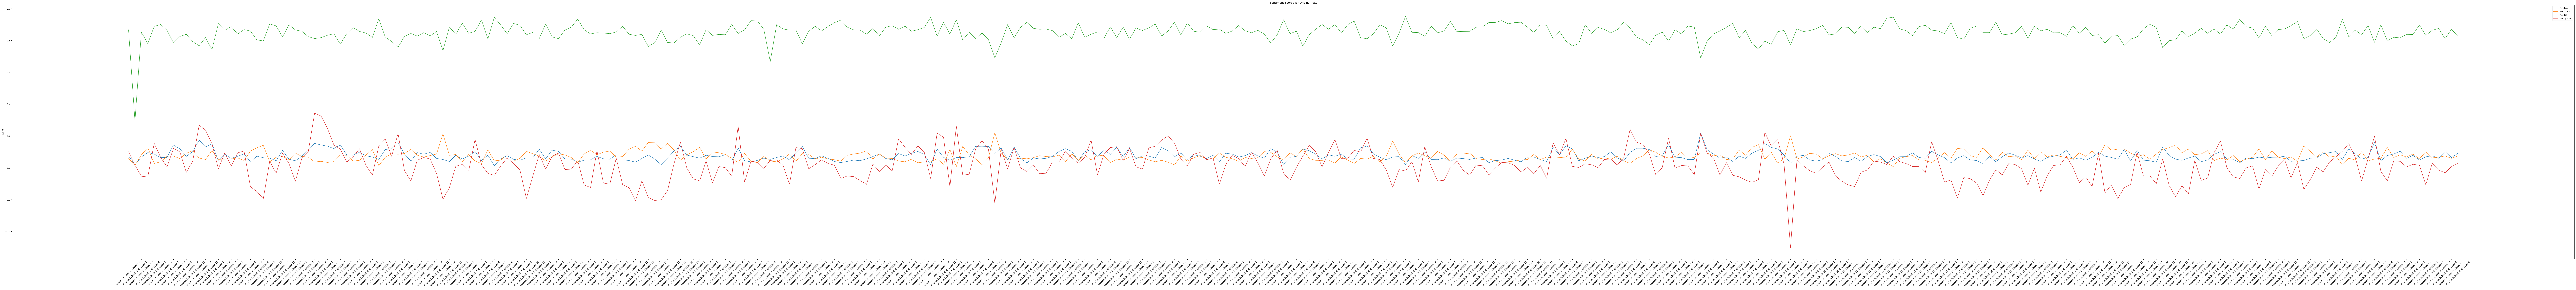

In [11]:
import matplotlib.pyplot as plt

# Extract sentiment scores from the 'Sentiment for Original Text' column
sentiment_scores = df['Sentiment for Original Text']

# Transpose the sentiment scores DataFrame
sentiment_scores = sentiment_scores.apply(lambda x: pd.Series(x))

# Plot all sentiment scores on the same graph
plt.figure(figsize=(200, 20))

for col in sentiment_scores.columns:
    plt.plot(df['Metadata'], sentiment_scores[col], label=col)

# Add labels and legend
plt.xlabel('Metadata')
plt.ylabel('Score')
plt.title('Sentiment Scores for Original Text')
plt.legend(labels=['Positive', 'Negative', 'Neutral', 'Compound'], loc='upper right')
plt.xlabel('Metadata', fontsize=4)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot

plt.savefig("originalplotsentiment.png")
plt.show()



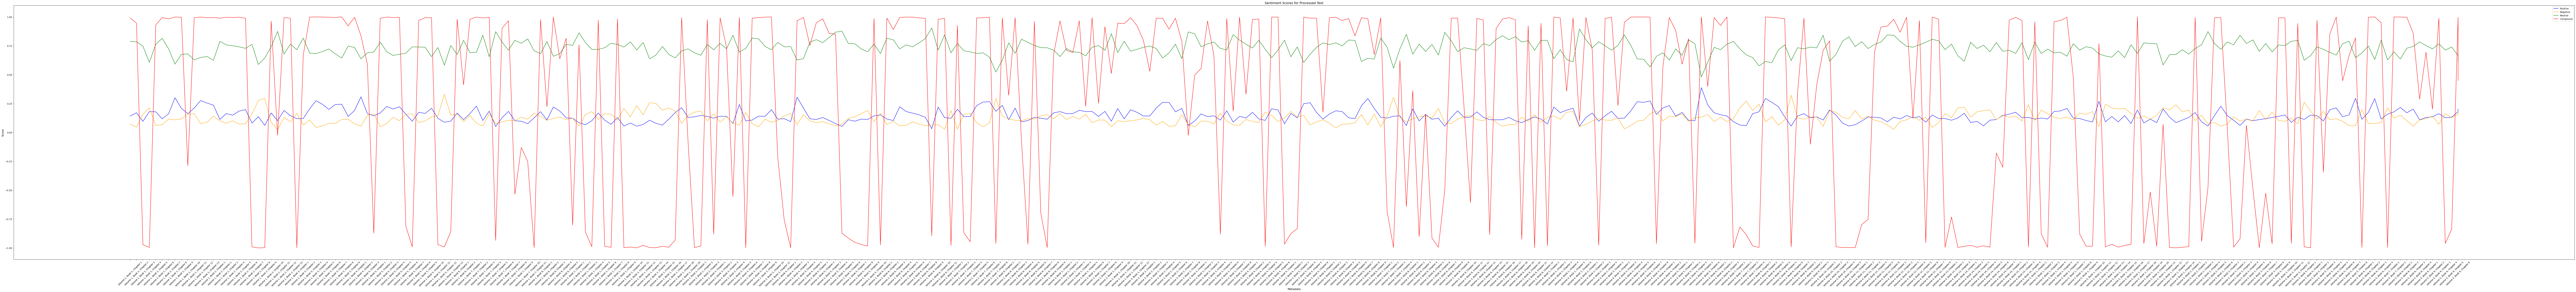

In [12]:
import matplotlib.pyplot as plt

# Extract sentiment scores from the 'Sentiment for Processed Text' column
sentiment_scores = df['Sentiment for Processed Text']

# Transpose the sentiment scores DataFrame
sentiment_scores = sentiment_scores.apply(lambda x: pd.Series(x))

# Define colors for each sentiment score
colors = ['blue', 'orange', 'green', 'red']

# Plot all sentiment scores on the same graph
plt.figure(figsize=(200, 20))

for i, col in enumerate(sentiment_scores.columns):
    plt.plot(df['Metadata'], sentiment_scores[col], label=col, color=colors[i])

# Add labels and legend
plt.xlabel('Metadata', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Sentiment Scores for Processed Text', fontsize=14)
plt.legend(labels=['Positive', 'Negative', 'Neutral', 'Compound'], loc='upper right') # Use column names as legend labels

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig("processedplotsentiment.png")
# Show plot
plt.show()


Below is a condensed version of the original text's sentiment. This was what I was originally going to include, but it's difficult to see the detail we need.

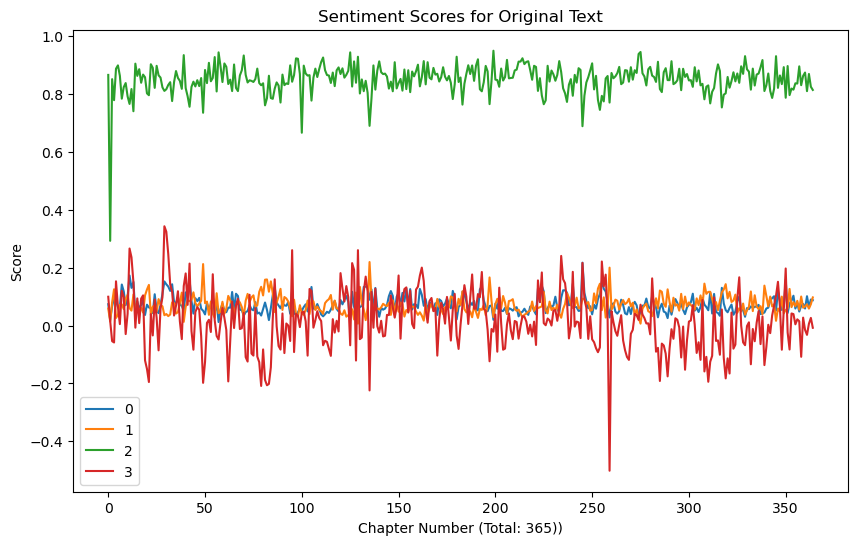

In [13]:


# Extract sentiment scores from the 'Sentiment for Original Text' column
sentiment_scores = df['Sentiment for Original Text']

# Transpose the sentiment scores DataFrame
sentiment_scores = sentiment_scores.apply(lambda x: pd.Series(x))

# Plot all sentiment scores on the same graph
plt.figure(figsize=(10, 6))

for col in sentiment_scores.columns:
    plt.plot(sentiment_scores.index, sentiment_scores[col], label=col)

# Add labels and legend
plt.xlabel('Chapter Number (Total: 365))')
plt.ylabel('Score')
plt.title('Sentiment Scores for Original Text')
plt.legend()

# Show plot
plt.show()

Next, we are going to display just the sentiment values for the original text.

In [100]:
# Access only the sentiment values from the 'Sentiment' column
sentiment_values = df['Sentiment for Original Text'].apply(pd.Series)

# Rename the columns for clarity
sentiment_values.columns = ['Positive', 'Negative', 'Neutral', 'Compound']

# Display the sentiment values
#display(sentiment_values)

Next, we are going to display the sentiment values for the processed text.

In [101]:
# Access only the sentiment values from the 'Sentiment' column
sentiment_values = df['Sentiment for Processed Text'].apply(pd.Series)

# Rename the columns for clarity
sentiment_values.columns = ['Positive', 'Negative', 'Neutral', 'Compound']

# Display the sentiment values
#display(sentiment_values)

Analyzing some of Les Amis together (Enjolras, Coufeyrac, Combeferre, Feuilly, Jehan), line by line.

In [14]:
import nltk
import pandas as pd

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('vader_lexicon')


# Read the text from the file "thetrio.txt"
file_path = "theamistogether.txt"
with open(file_path, 'r') as file:
    amis_together_lines = file.readlines()

sents = []
processed_sents = []

curr_sent = []
curr_processed_sent = []

for line in amis_together_lines: 
    line = line.strip()  # Remove leading and trailing whitespace
    if not line:  # Skip empty or whitespace-only lines
        continue
    sents.append("".join(line).lower())  # Combine text lines into a single string, make all lower case
    curr_processed_sent = process_text("".join(line))
    processed_sents.append(curr_processed_sent.lower())
    curr_sent = []
    
    
theamisdf = pd.DataFrame({"Original Sentence": sents, "Processed Sentence": processed_sents})
original_sentiment = theamisdf["Original Sentence"].apply(get_sentiment_scores)
processed_sentiment = theamisdf["Processed Sentence"].apply(get_sentiment_scores)


# Apply sentiment analysis to each processed text (no punctuation, no stopwords) in the DataFrame
theamisdf['Sentiment for Original Sentence'] = original_sentiment
theamisdf['Sentiment for Processed Sentence'] = processed_sentiment

# Display the DataFrame with each sentence's text and sentiment scores
display(theamisdf)


[nltk_data] Downloading package punkt to /Users/yong-yu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Original Sentence  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        the greater part of the friends of the a b c were students, who were on cordial terms with the working classes.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              here are the names of the principal ones.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 they belong, in a certain measure, to history:  enjolras, combeferre, jean prouvaire, feuilly, courfeyrac, bahorel, lesgle or laigle, joly, grantaire.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               these young men formed a sort of family, through the bond of friendship.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                all, with the exception of laigle, were from the south.   
5                                                                              

This is looking at each of the Amis individually, with their initial character introductions. 


In [51]:
import nltk
import pandas as pd

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('vader_lexicon')


# Read the text from the file "enjolras.txt" and so on
file_path = "enjolras.txt"
with open(file_path, 'r') as file:
    enjolras_lines = file.readlines()

file_path = "combeferre.txt"
with open(file_path, 'r') as file:
    combeferre_lines = file.readlines()

file_path = "courfeyrac.txt"
with open(file_path, 'r') as file:
    courfeyrac_lines = file.readlines()

file_path = "feuilly.txt"
with open(file_path, 'r') as file:
    feuilly_lines = file.readlines()

file_path = "jehan.txt"
with open(file_path, 'r') as file:
    jehan_lines = file.readlines()

file_path = "bahorel.txt"
with open(file_path, 'r') as file:
    bahorel_lines = file.readlines()

file_path = "bossuet.txt"
with open(file_path, 'r') as file:
   bossuet_lines = file.readlines()

file_path = "joly.txt"
with open(file_path, 'r') as file:
    joly_lines = file.readlines()

file_path = "grantaire.txt"
with open(file_path, 'r') as file:
    grantaire_lines = file.readlines()
    

# Overall

enjolras_text = "".join(enjolras_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
enjolras_processed_text = process_text("".join(enjolras_lines)).lower()

combeferre_text = "".join(combeferre_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
combeferre_processed_text = process_text("".join(combeferre_lines)).lower()

courfeyrac_text = "".join(courfeyrac_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
courfeyrac_processed_text = process_text("".join(courfeyrac_lines)).lower()

feuilly_text = "".join(feuilly_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
feuilly_processed_text = process_text("".join(feuilly_lines)).lower()

jehan_text = "".join(jehan_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
jehan_processed_text = process_text("".join(jehan_lines)).lower()

bahorel_text = "".join(bahorel_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
bahorel_processed_text = process_text("".join(bahorel_lines)).lower()

bossuet_text = "".join(bossuet_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
bossuet_processed_text = process_text("".join(bossuet_lines)).lower()

joly_text = "".join(joly_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
joly_processed_text = process_text("".join(joly_lines)).lower()

grantaire_text = "".join(grantaire_lines).replace('\n', " ").lower()  # Combine text lines into a single string, make all lower case
grantaire_processed_text = process_text("".join(grantaire_lines)).lower()



#enjolrasdf = pd.DataFrame({"Original Text": text, "Processed Text": processed_text})
theamisdf = pd.DataFrame({"Character":["Enjolras", "Combeferre", "Courfeyrac", "Feuilly", "Jehan", "Bahorel", "Bossuet", "Joly", "Grantaire"],
                           "Original Text": [enjolras_text, combeferre_text, courfeyrac_text, feuilly_text, jehan_text, bahorel_text, bossuet_text, joly_text, grantaire_text], 
                           "Processed Text": [enjolras_processed_text, combeferre_processed_text, courfeyrac_processed_text, feuilly_processed_text, jehan_processed_text, bahorel_processed_text, bossuet_processed_text, joly_processed_text, grantaire_processed_text]})
original_sentiment = theamisdf["Original Text"].apply(get_sentiment_scores)
processed_sentiment = theamisdf["Processed Text"].apply(get_sentiment_scores)


# Apply sentiment analysis to each processed text (no punctuation, no stopwords) in the DataFrame
theamisdf['Sentiment for Original Text'] = original_sentiment
theamisdf['Sentiment for Processed Text'] = processed_sentiment
display(theamisdf)
"""
sents = []
processed_sents = []

curr_sent = []
curr_processed_sent = []

for line in enjolras_lines: 
    line = line.strip()  # Remove leading and trailing whitespace
    if not line:  # Skip empty or whitespace-only lines
        continue
    sents.append("".join(line).lower())  # Combine text lines into a single string, make all lower case
    curr_processed_sent = process_text("".join(line))
    processed_sents.append(curr_processed_sent.lower())
    curr_sent = []


# By Sentence
enjolrasdf = pd.DataFrame({"Original Sentence": sents, "Processed Sentence": processed_sents})
original_sentiment = enjolrasdf["Original Sentence"].apply(get_sentiment_scores)
processed_sentiment = enjolrasdf["Processed Sentence"].apply(get_sentiment_scores)


# Apply sentiment analysis to each processed text (no punctuation, no stopwords) in the DataFrame
enjolrasdf['Sentiment for Original Sentence'] = original_sentiment
enjolrasdf['Sentiment for Processed Sentence'] = processed_sentiment
# Display the DataFrame with each sentence's text and sentiment scores
display(enjolrasdf)
"""   



[nltk_data] Downloading package punkt to /Users/yong-yu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /Users/yong-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Character  \
0    Enjolras   
1  Combeferre   
2  Courfeyrac   
3     Feuilly   
4       Jehan   
5     Bahorel   
6     Bossuet   
7        Joly   
8   Grantaire   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

'\nsents = []\nprocessed_sents = []\n\ncurr_sent = []\ncurr_processed_sent = []\n\nfor line in enjolras_lines: \n    line = line.strip()  # Remove leading and trailing whitespace\n    if not line:  # Skip empty or whitespace-only lines\n        continue\n    sents.append("".join(line).lower())  # Combine text lines into a single string, make all lower case\n    curr_processed_sent = process_text("".join(line))\n    processed_sents.append(curr_processed_sent.lower())\n    curr_sent = []\n\n\n# By Sentence\nenjolrasdf = pd.DataFrame({"Original Sentence": sents, "Processed Sentence": processed_sents})\noriginal_sentiment = enjolrasdf["Original Sentence"].apply(get_sentiment_scores)\nprocessed_sentiment = enjolrasdf["Processed Sentence"].apply(get_sentiment_scores)\n\n\n# Apply sentiment analysis to each processed text (no punctuation, no stopwords) in the DataFrame\nenjolrasdf[\'Sentiment for Original Sentence\'] = original_sentiment\nenjolrasdf[\'Sentiment for Processed Sentence\'] = pro

Below is an attempt to look at word similarity. I don't know if this is super helpful, but it was interesting to look at, nonetheless. 

In [151]:
from gensim.models import Word2Vec
import nltk
import string
print(string.punctuation)
# Define the process_text function
def process_text(text):
    text = text.lower().strip()
    for punctuation_char in string.punctuation:
        text = text.replace(punctuation_char, "")
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    no_stop_words_punctuation = [word for word in tokens if word not in stop_words]
    return no_stop_words_punctuation

# Read the text from the file
file_path = "lesmis.txt"
with open(file_path, 'r') as file:
    text = file.read()

# Preprocess the text
words = process_text(text)

#print(words)
# Tokenize the preprocessed text into word

# Train the Word2Vec model
model = Word2Vec([words], vector_size=1000, window=100, min_count=1, workers=4, sg=1)
model.train([words],total_examples=model.corpus_count,epochs=30)
# Save the trained model
# Save the trained model
model.save("word2vec_lesmis.model")


vocab = model.wv.key_to_index
print("v1000, w100: " + str(len(vocab)))

# find most similar to Enjolras

similar_words = model.wv.similar_by_word("revolution", 10)
print("10 Words similar to 'revolution':", similar_words)

similar_words = model.wv.similar_by_word("law", 10)
print("10 Words similar to 'law':", similar_words)

similar_words = model.wv.similar_by_word("god", 10)
print("10 Words similar to 'god':", similar_words)

similar_words = model.wv.similar_by_word("working", 10)
print("10 Words similar to 'working':", similar_words)

similar_words = model.wv.similar_by_word("bourgeois", 10)
print("10 Words similar to 'bourgeois':", similar_words)

similar_words = model.wv.similar_by_word("church", 10)
print("10 Words similar to 'church':", similar_words)

similar_words = model.wv.similar_by_word("poor", 10)
print("10 Words similar to 'poor':", similar_words)

similar_words = model.wv.similar_by_word("class", 10)
print("10 Words similar to 'class':", similar_words)

similar_words = model.wv.similar_by_word("rich", 10)
print("10 Words similar to 'rich':", similar_words)

similar_words = model.wv.similar_by_word("government", 10)
print("10 Words similar to 'government':", similar_words)

similar_words = model.wv.similar_by_word("justice", 10)
print("10 Words similar to 'justice':", similar_words)

similar_words = model.wv.similar_by_word("france", 10)
print("10 Words similar to 'france':", similar_words)

similar_words = model.wv.similar_by_word("liberty", 10)
print("10 Words similar to 'liberty':", similar_words)

answer = model.wv.doesnt_match(["enjolras",'combeferre','courfeyrac','fantine'])
print("doesnt match" +str(answer))

similarity1 = model.wv.similarity('grantaire', 'valjean')
similarity2 = model.wv.similarity('enjolras', 'grantaire')
similarity3 = model.wv.similarity('valjean', 'combeferre')
print("Similarity between 'grantaire', 'valjean:'" + str(similarity1))
print("Similarity between 'enjolras', 'grantaire:'" + str(similarity2))
print("Similarity between 'valjean', 'combeferre:'" + str(similarity3))

#"""25 Words similar to 'Eponine': [('uneasiness', 0.37610548734664917), ('apparatus', 0.36587709188461304), ('persist', 0.3481895923614502), ('arisen', 0.3445114493370056), ('intrepidly', 0.34324419498443604), ('incited', 0.3301970660686493), ('decres', 0.3300429582595825), ('moats', 0.32944056391716003), ('worka', 0.32748517394065857), ('misunderstood', 0.32619553804397583), ('ambigu', 0.32589566707611084), ('claudian', 0.3235270082950592), ('infinities', 0.3233884274959564), ('exposition', 0.3215968608856201), ('augment', 0.31280961632728577), ('journal', 0.31166785955429077), ('castratus', 0.3105472922325134), ('deciphering', 0.30984723567962646), ('array', 0.30514663457870483), ('turk', 0.30137208104133606), ('thespis', 0.30094262957572937), ('silly', 0.300514280796051), ('champ', 0.2982563078403473), ('lawyers', 0.2965396046638489), ('acknowledging', 0.29476264119148254)]"""
#print(model.wv.most_similar(positive=['Enjolras', 'student'], negative=['man']))


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
v1000, w100: 25057
10 Words similar to 'revolution': [('french', 0.7085455060005188), ('fate', 0.7074085474014282), ('important', 0.7070040106773376), ('opinion', 0.7008317708969116), ('gallantry', 0.6964436769485474), ('93', 0.6957070827484131), ('precipitation', 0.6936567425727844), ('early', 0.6914274096488953), ('decimated', 0.6891172528266907), ('parliamentary', 0.6857988834381104)]
10 Words similar to 'law': [('preserved', 0.7533455491065979), ('distinguished', 0.742832362651825), ('cordiality', 0.7414597868919373), ('reproach', 0.7398356199264526), ('octogenarians', 0.7396482229232788), ('upright', 0.7390487194061279), ('possibly', 0.7369739413261414), ('vibrating', 0.7349878549575806), ('sympathy', 0.7347917556762695), ('returning', 0.7334039211273193)]
10 Words similar to 'god': [('say', 0.5556415319442749), ('would', 0.5549756288528442), ('friends', 0.5464918613433838), ('without', 0.5410747528076172), ('things', 0.5372605323791504), ('loud', 

Word2Vec, vector_size=100, window=10

In [149]:
from gensim.models import Word2Vec
import nltk
import string

# Read the text from the file
file_path = "lesmis.txt"
with open(file_path, 'r') as file:
    text = file.read()

# Remove punctuation, but keep stopwords
text = text.translate(str.maketrans('', '', string.punctuation))
# Make lowercase
text = text.lower()

# Tokenize text
words = nltk.word_tokenize(text)

# Train Word2Vec model
model = Word2Vec([words], vector_size=100, window=10, min_count=1, workers=4, sorted_vocab=True, sg=1)

# Save trained model
model.save("word2vec_lesmis.model")

vocab = model.wv.key_to_index
print("v100, w10: " + str(len(vocab)))

# find most similar to Enjolras
similar_words = model.wv.similar_by_word("eponine", 25)
print("25 Words similar to 'Eponine':", similar_words)

similar_words = model.wv.similar_by_word("cosette", 25)
print("25 Words similar to 'Cosette':", similar_words)

similar_words = model.wv.similar_by_word("fantine", 25)
print("25 Words similar to 'Fantine':", similar_words)

similar_words = model.wv.similar_by_word("revolution", 25)
print("25 Words similar to 'revolution':", similar_words)

similar_words = model.wv.similar_by_word("law", 25)
print("25 Words similar to 'law':", similar_words)

similarity1 = model.wv.similarity('grantaire', 'valjean')
similarity2 = model.wv.similarity('enjolras', 'grantaire')
similarity3 = model.wv.similarity('valjean', 'combeferre')
print("Similarity between 'grantaire', 'valjean:'" + str(similarity1))
print("Similarity between 'enjolras', 'grantaire:'" + str(similarity2))
print("Similarity between 'valjean', 'combeferre:'" + str(similarity3))

#"""25 Words similar to 'Eponine': [('uneasiness', 0.37610548734664917), ('apparatus', 0.36587709188461304), ('persist', 0.3481895923614502), ('arisen', 0.3445114493370056), ('intrepidly', 0.34324419498443604), ('incited', 0.3301970660686493), ('decres', 0.3300429582595825), ('moats', 0.32944056391716003), ('worka', 0.32748517394065857), ('misunderstood', 0.32619553804397583), ('ambigu', 0.32589566707611084), ('claudian', 0.3235270082950592), ('infinities', 0.3233884274959564), ('exposition', 0.3215968608856201), ('augment', 0.31280961632728577), ('journal', 0.31166785955429077), ('castratus', 0.3105472922325134), ('deciphering', 0.30984723567962646), ('array', 0.30514663457870483), ('turk', 0.30137208104133606), ('thespis', 0.30094262957572937), ('silly', 0.300514280796051), ('champ', 0.2982563078403473), ('lawyers', 0.2965396046638489), ('acknowledging', 0.29476264119148254)]"""
#print(model.wv.most_similar(positive=['Enjolras', 'student'], negative=['man']))

v100, w10: 25191
25 Words similar to 'Eponine': [('uneasiness', 0.37610548734664917), ('apparatus', 0.36587709188461304), ('persist', 0.3481895923614502), ('arisen', 0.3445114493370056), ('intrepidly', 0.34324419498443604), ('incited', 0.3301970660686493), ('decres', 0.3300429582595825), ('moats', 0.32944056391716003), ('worka', 0.32748517394065857), ('misunderstood', 0.32619553804397583), ('ambigu', 0.32589566707611084), ('claudian', 0.3235270082950592), ('infinities', 0.3233884274959564), ('exposition', 0.3215968608856201), ('augment', 0.31280961632728577), ('journal', 0.31166785955429077), ('castratus', 0.3105472922325134), ('deciphering', 0.30984723567962646), ('array', 0.30514663457870483), ('turk', 0.30137208104133606), ('thespis', 0.30094262957572937), ('silly', 0.300514280796051), ('champ', 0.2982563078403473), ('lawyers', 0.2965396046638489), ('acknowledging', 0.29476264119148254)]
25 Words similar to 'Cosette': [('thenand', 0.37178710103034973), ('lied', 0.3613303303718567), 

Training GloVe algorithm on corpus

In [154]:
import numpy as np

# Load the trained word vectors
word_vectors = {}
with open("/Users/yong-yu/Desktop/complingfinalproj/.ipynb_checkpoints/glove/vectors.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype=np.float32)
        word_vectors[word] = vector

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

# Get the word vectors for "enjolras" and "grantaire"
enjolras_vector = word_vectors["enjolras"]
grantaire_vector = word_vectors["grantaire"]

enjolras_vector = word_vectors["enjolras"]
valjean_vector = word_vectors["valjean"]

combeferre_vector = word_vectors["combeferre"]
valjean_vector = word_vectors["valjean"]


# Calculate the cosine similarity between "enjolras" and "grantaire"
similarity = cosine_similarity(enjolras_vector, grantaire_vector)
print("Cosine similarity between 'enjolras' and 'grantaire':", similarity)


# Calculate the cosine similarity between "enjolras" and "valjean"
similarity = cosine_similarity(enjolras_vector, valjean_vector)
print("Cosine similarity between 'enjolras' and 'valjean':", similarity)


# Calculate the cosine similarity between "valjean" and "combeferre"
similarity = cosine_similarity(valjean_vector, combeferre_vector)
print("Cosine similarity between 'valjean' and 'combeferre':", similarity)

Cosine similarity between 'enjolras' and 'grantaire': 0.64294946
Cosine similarity between 'enjolras' and 'valjean': 0.2573368
Cosine similarity between 'valjean' and 'combeferre': 0.3236971
